In [ ]:
from google.colab import files
uploaded = files.upload()

Saving titanic.csv to titanic.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [ ]:
df = pd.read_csv('titanic.csv')


In [ ]:
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [ ]:
df.shape

(418, 11)

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 36.1+ KB


In [ ]:
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,32.398325,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,15.984755,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,22.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,29.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,42.750000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,92.000000,8.000000,9.000000,512.329200


In [ ]:
df.describe(include="object")

,Name,Sex,Ticket,Embarked
count,418,418,418,418
unique,418,2,363,3
top,"Peter, Master. Michael J",male,PC 17608,S
freq,1,266,5,270


In [ ]:
df.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,1


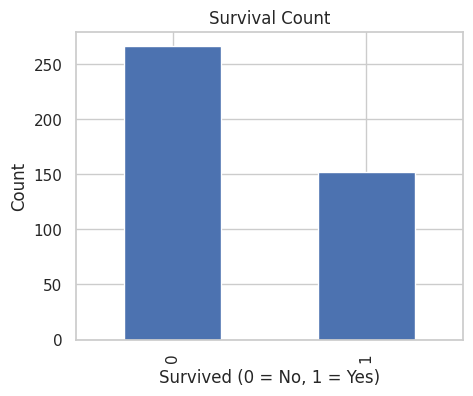

In [ ]:
plt.figure(figsize=(5,4))
df['Survived'].value_counts().plot(kind='bar')
plt.title("Survival Count")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


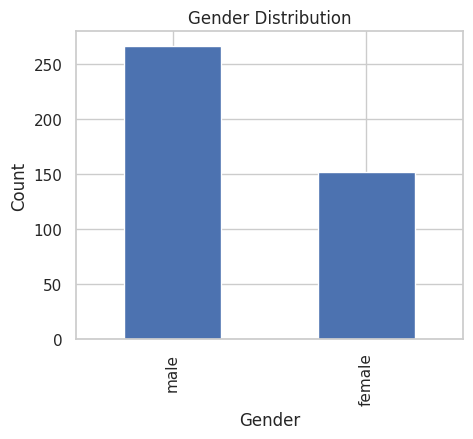

In [ ]:
plt.figure(figsize=(5,4))
df['Sex'].value_counts().plot(kind='bar')
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


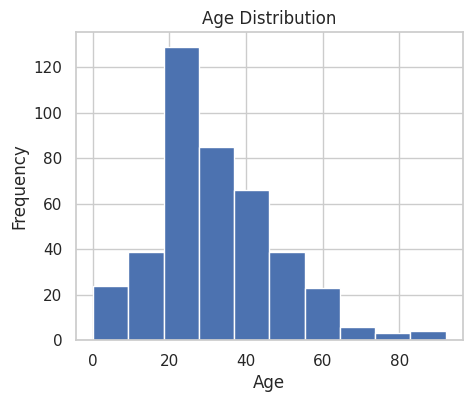

In [ ]:
plt.figure(figsize=(5,4))
df['Age'].plot(kind='hist')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


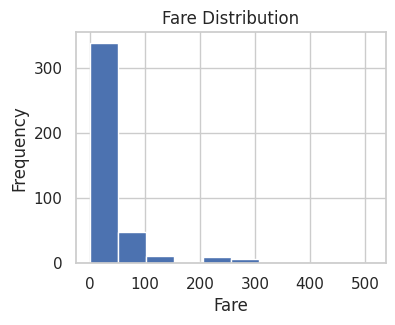

In [ ]:
plt.figure(figsize=(4,3))
df['Fare'].plot(kind='hist')
plt.title("Fare Distribution")
plt.xlabel("Fare")
plt.ylabel("Frequency")
plt.show()


Survived    0    1
Sex               
female      0  152
male      266    0


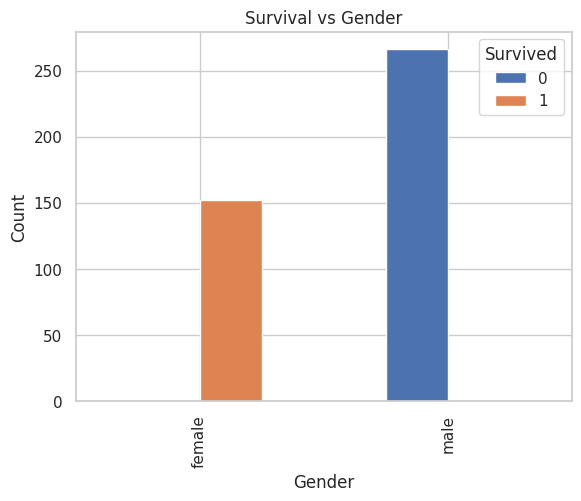

In [ ]:
survival_gender = pd.crosstab(df['Sex'], df['Survived'])
print(survival_gender)

survival_gender.plot(kind='bar')
plt.title("Survival vs Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


Survived    0   1
Pclass           
1          57  50
2          63  30
3         146  72


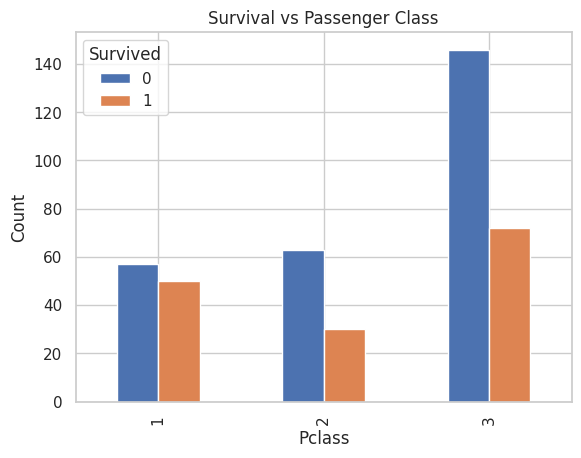

In [ ]:
survival_class = pd.crosstab(df['Pclass'], df['Survived'])
print(survival_class)

survival_class.plot(kind='bar')
plt.title("Survival vs Passenger Class")
plt.xlabel("Pclass")
plt.ylabel("Count")
plt.show()


In [ ]:

num_df = df.select_dtypes(include=[np.number])
corr = num_df.corr()
print(corr)

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.023245 -0.026751 -0.014087  0.003818  0.043080   
Survived       -0.023245  1.000000 -0.108615 -0.064777  0.099943  0.159120   
Pclass         -0.026751 -0.108615  1.000000 -0.268407  0.001087  0.018721   
Age            -0.014087 -0.064777 -0.268407  1.000000 -0.066357  0.005900   
SibSp           0.003818  0.099943  0.001087 -0.066357  1.000000  0.306895   
Parch           0.043080  0.159120  0.018721  0.005900  0.306895  1.000000   
Fare            0.008211  0.191514 -0.577147  0.214703  0.171539  0.230046   

                 Fare  
PassengerId  0.008211  
Survived     0.191514  
Pclass      -0.577147  
Age          0.214703  
SibSp        0.171539  
Parch        0.230046  
Fare         1.000000  


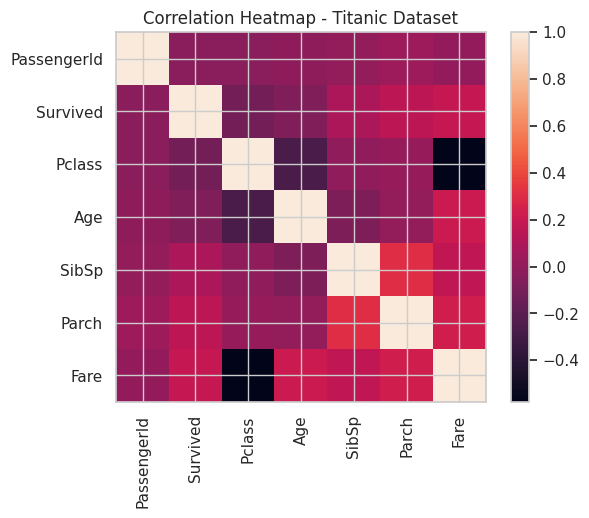

In [ ]:
plt.figure()
plt.imshow(corr)
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Heatmap - Titanic Dataset")
plt.show()

In [ ]:
survival_rate = df['Survived'].value_counts(normalize=True) * 100
print(survival_rate)


Survived
0    63.636364
1    36.363636
Name: proportion, dtype: float64


Survived     0   1
AgeGroup          
Child       16  14
Teen        18  12
Adult      133  73
MiddleAge   80  48
Senior      19   5


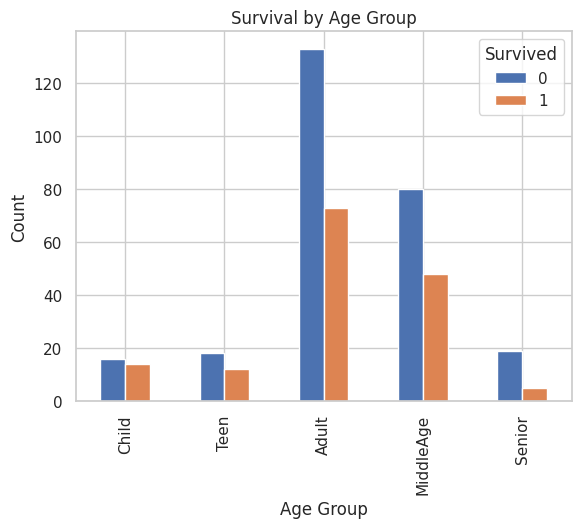

In [ ]:
df['AgeGroup'] = pd.cut(
    df['Age'],
    bins=[0, 12, 18, 35, 60, 100],
    labels=['Child', 'Teen', 'Adult', 'MiddleAge', 'Senior']
)

age_survival = pd.crosstab(df['AgeGroup'], df['Survived'])
print(age_survival)

age_survival.plot(kind='bar')
plt.title("Survival by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()


Survived    0   1
FareGroup        
Low        84  30
Medium     70  26
High       64  41
Very High  47  55


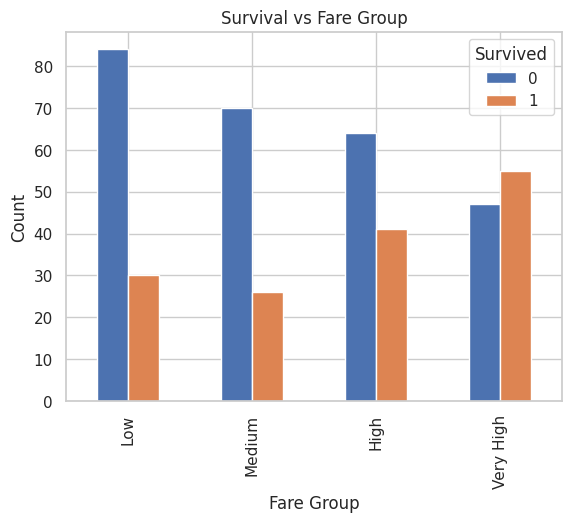

In [ ]:
df['FareGroup'] = pd.qcut(df['Fare'], 4, labels=['Low', 'Medium', 'High', 'Very High'])

fare_survival = pd.crosstab(df['FareGroup'], df['Survived'])
print(fare_survival)

fare_survival.plot(kind='bar')
plt.title("Survival vs Fare Group")
plt.xlabel("Fare Group")
plt.ylabel("Count")
plt.show()
